# Import Dataset

In [2]:
import pandas as pd

data = pd.read_csv('Crop_recommendation.csv')

print(data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [7]:
print(data.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


### Distribution count of Corps

Corp Numbers: 22
Corp Types: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


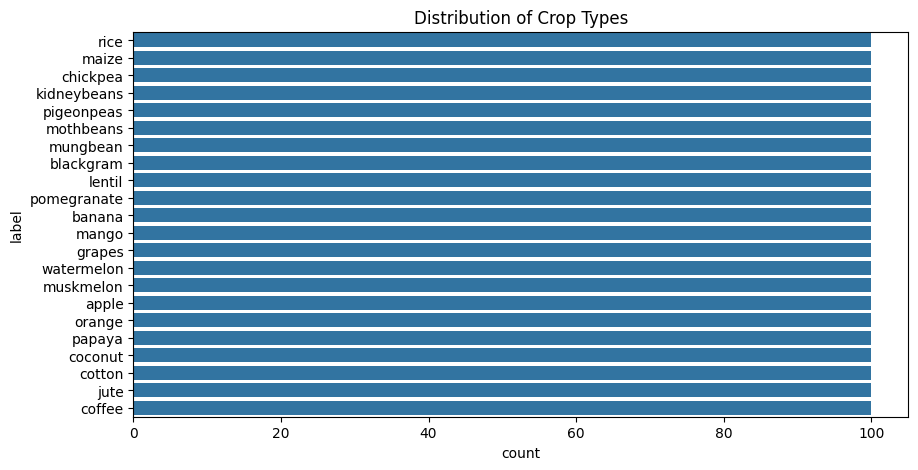

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Corp Numbers:", data['label'].nunique())
print("Corp Types:", data['label'].unique())

plt.figure(figsize=(10,5))
sns.countplot(y='label', data=data, order=data['label'].value_counts().index)
plt.title("Distribution of Crop Types")
plt.show()

### Check if Colums has null values

In [15]:
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


#### * Show Outlears *

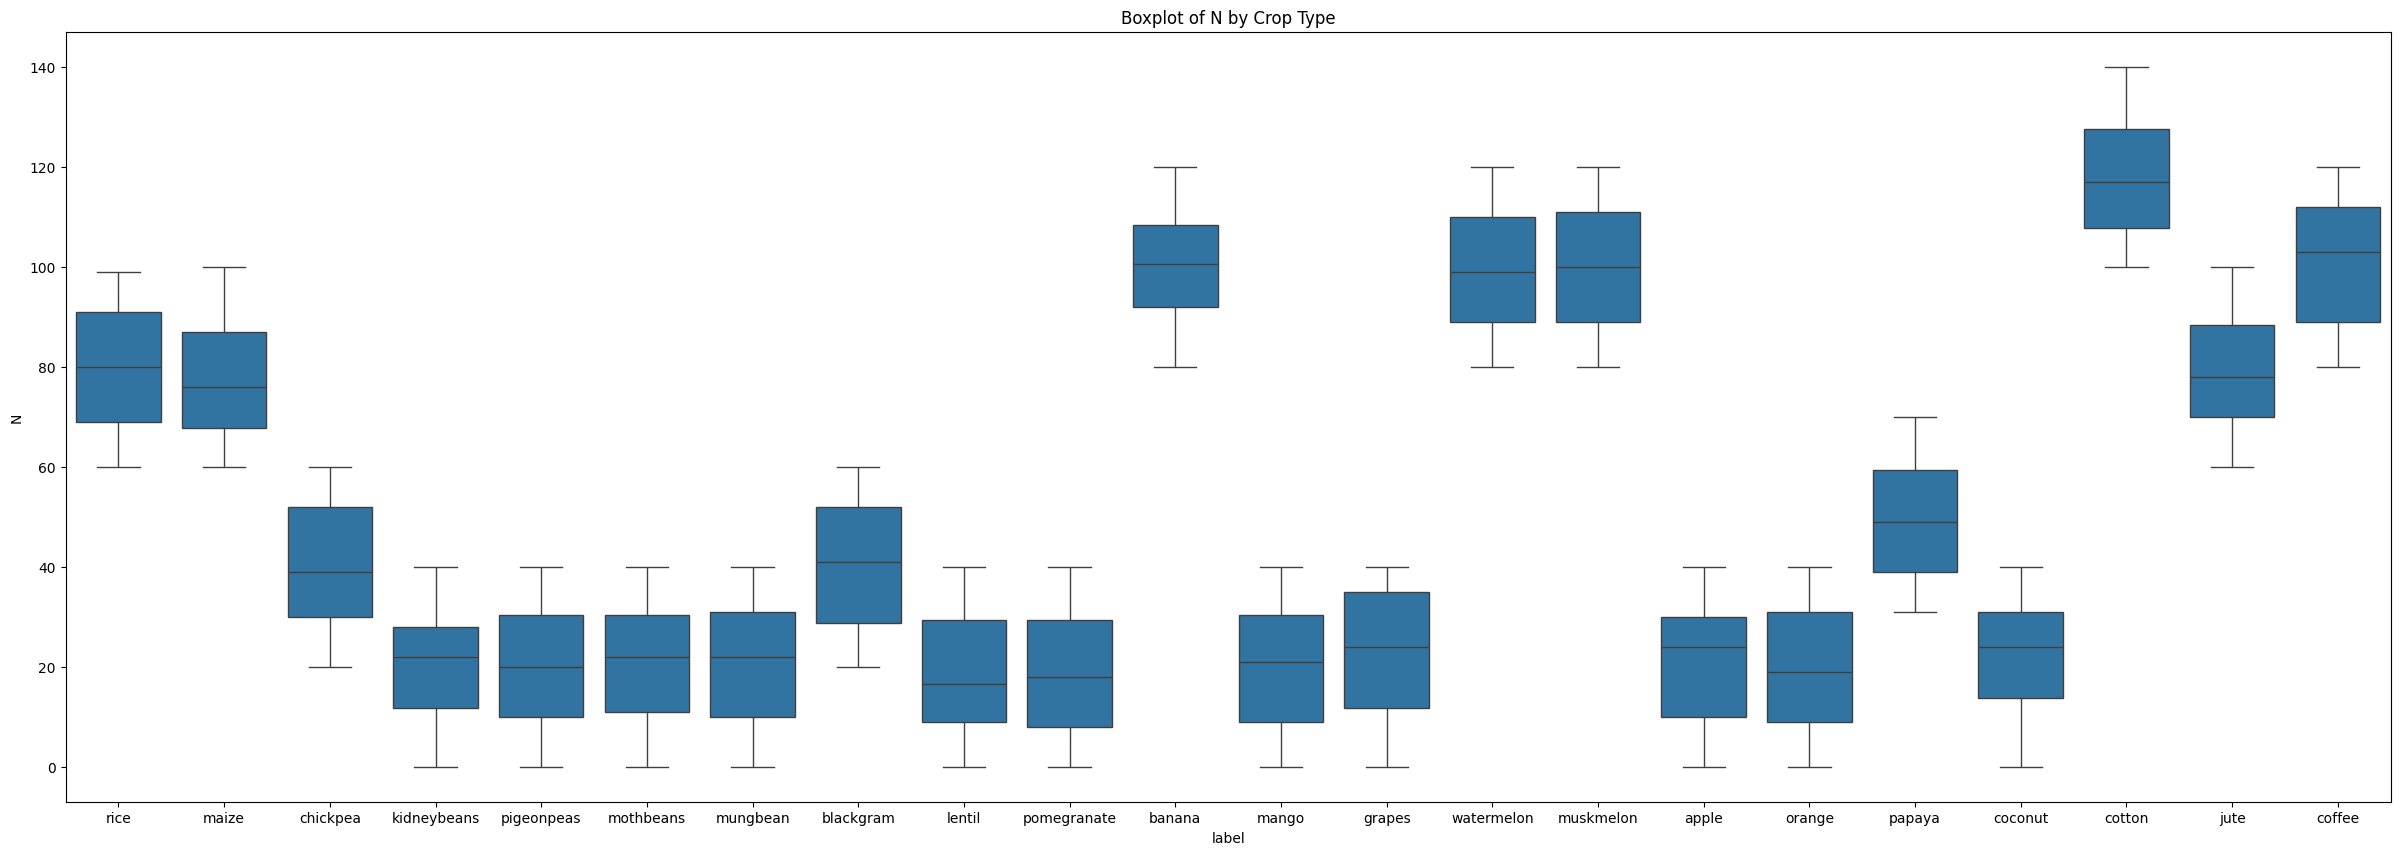

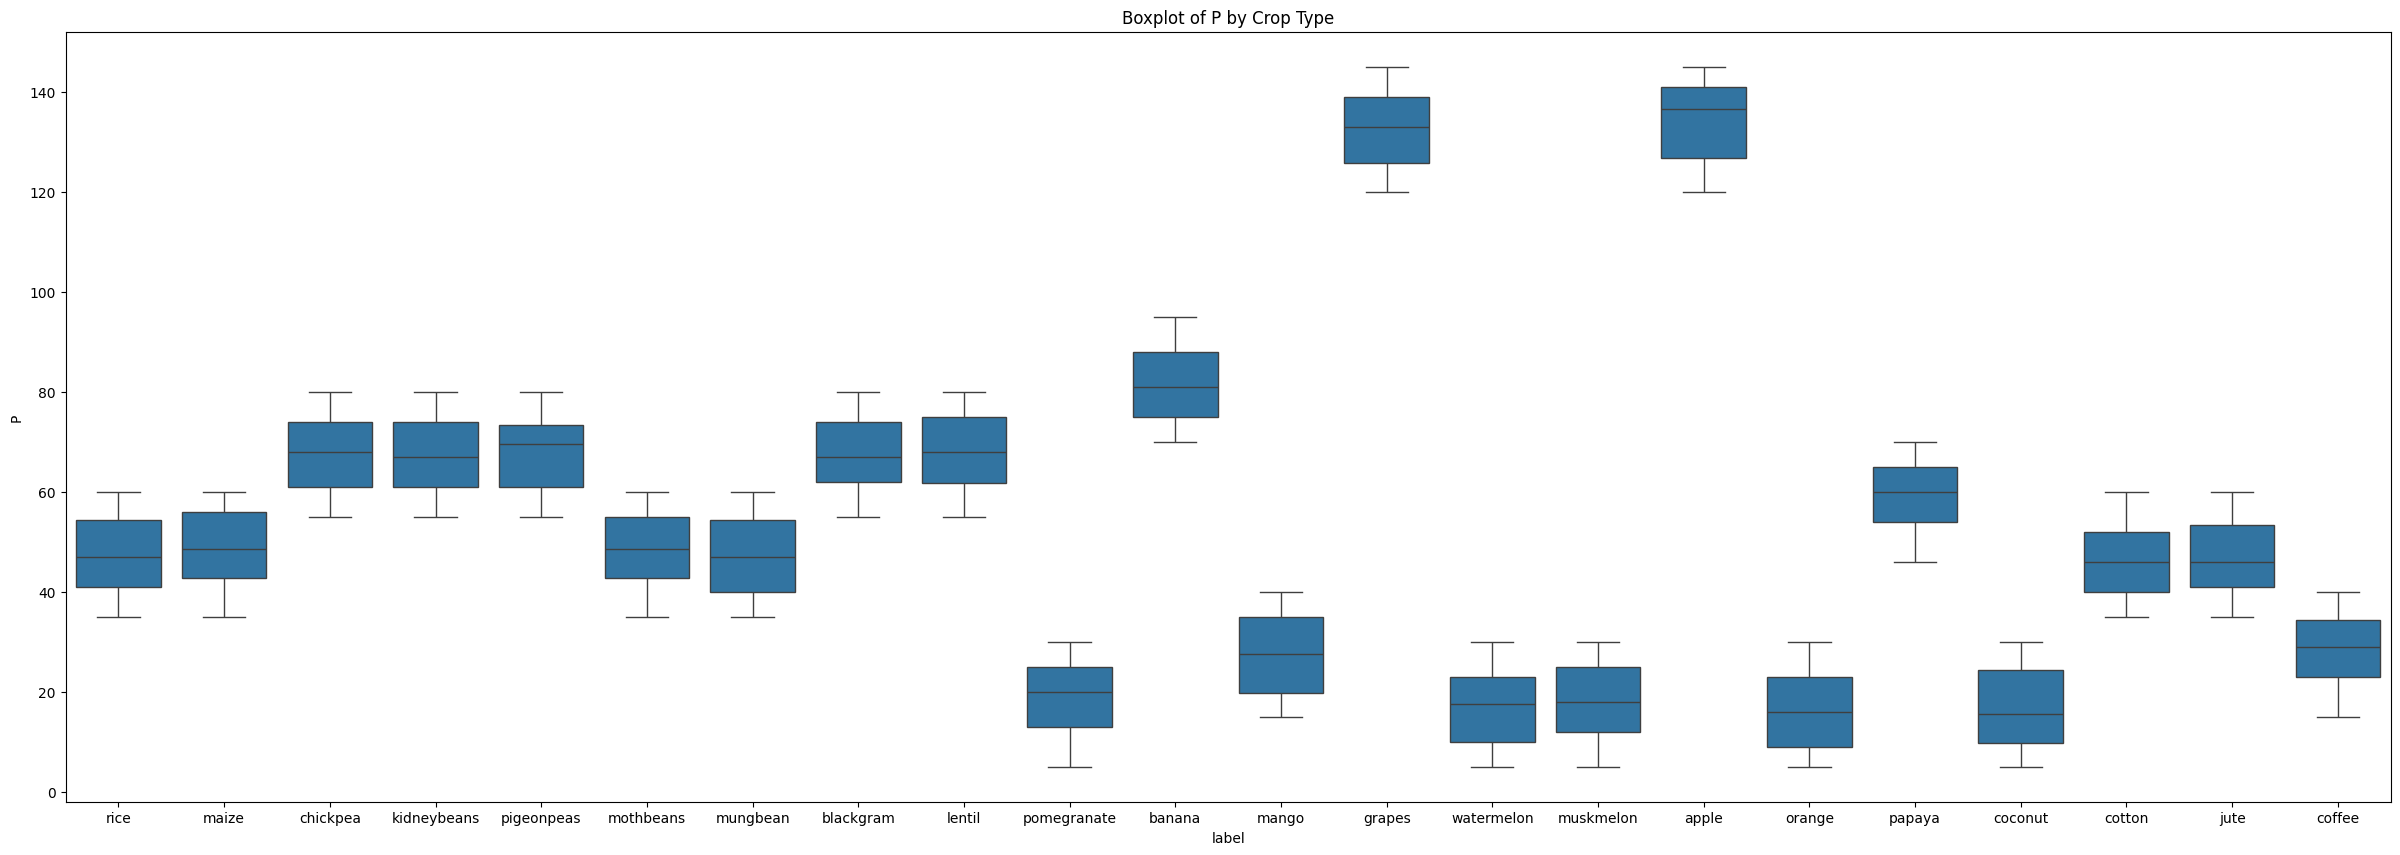

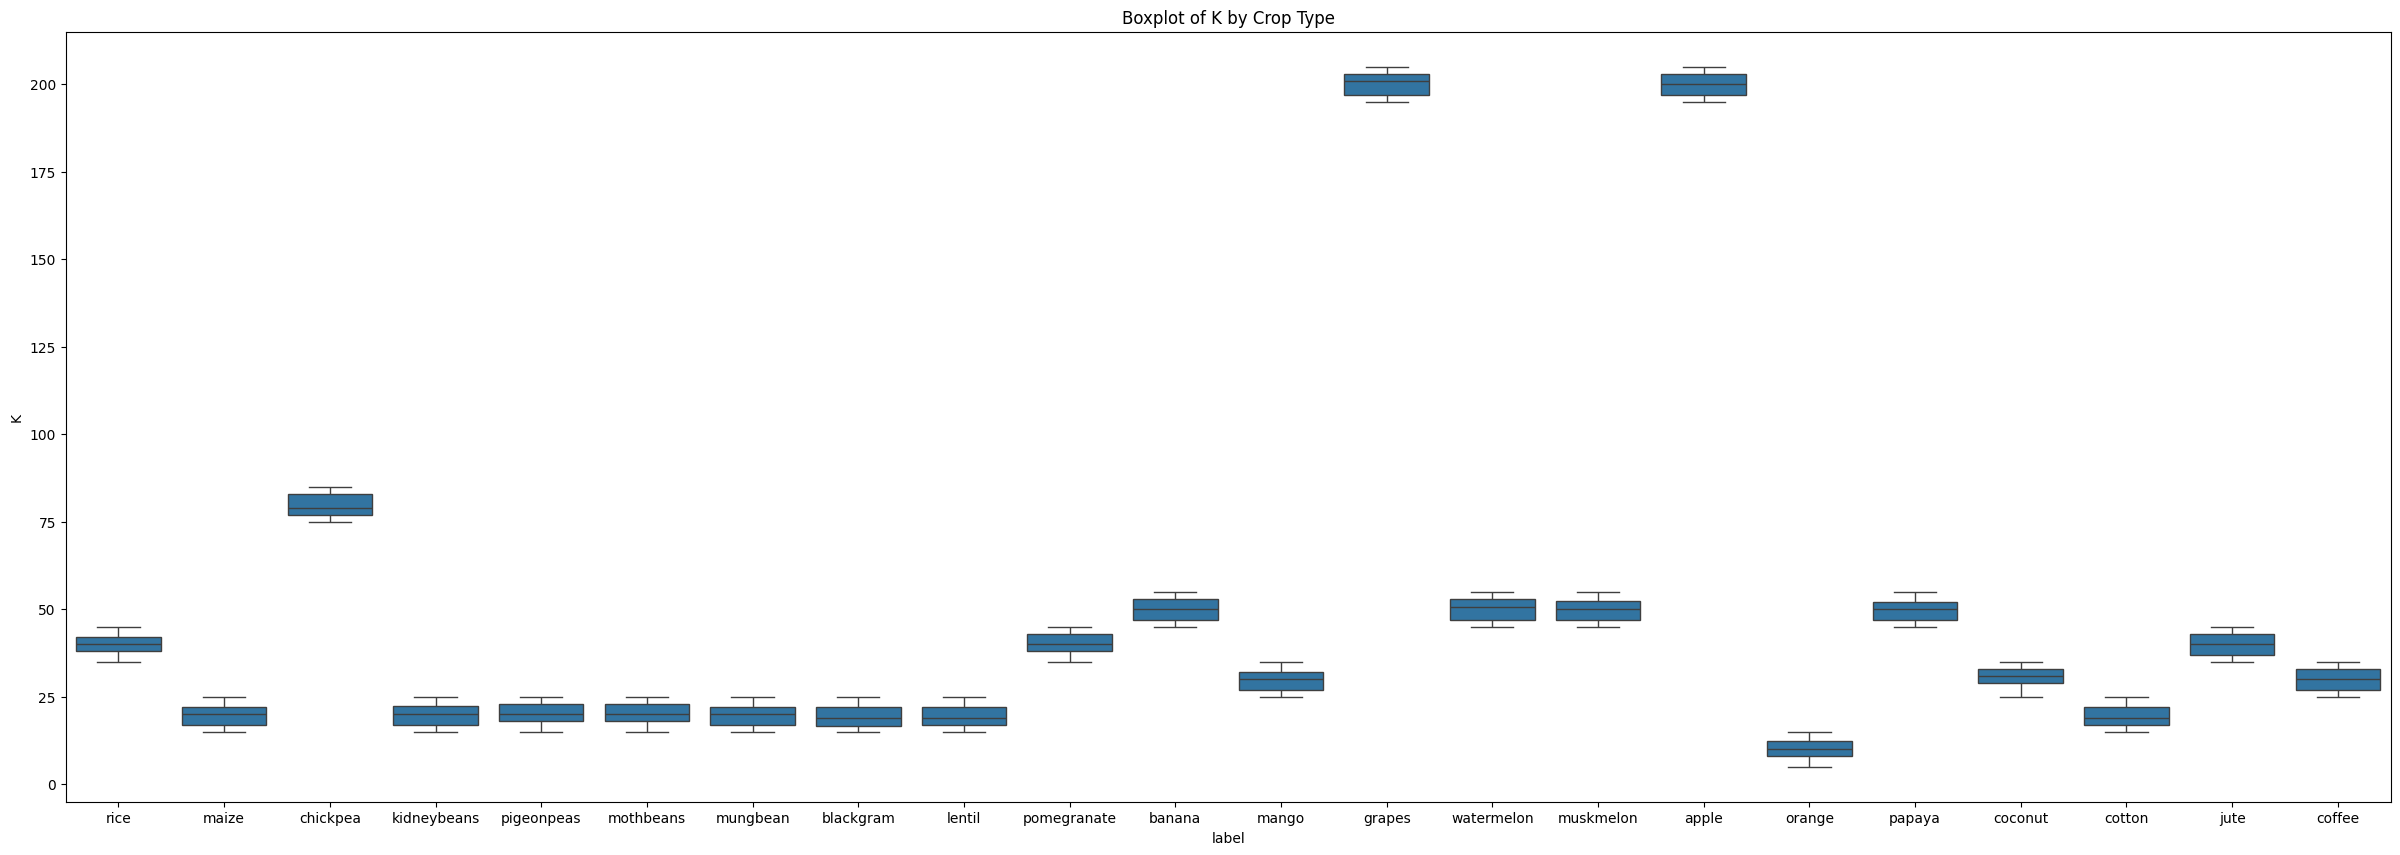

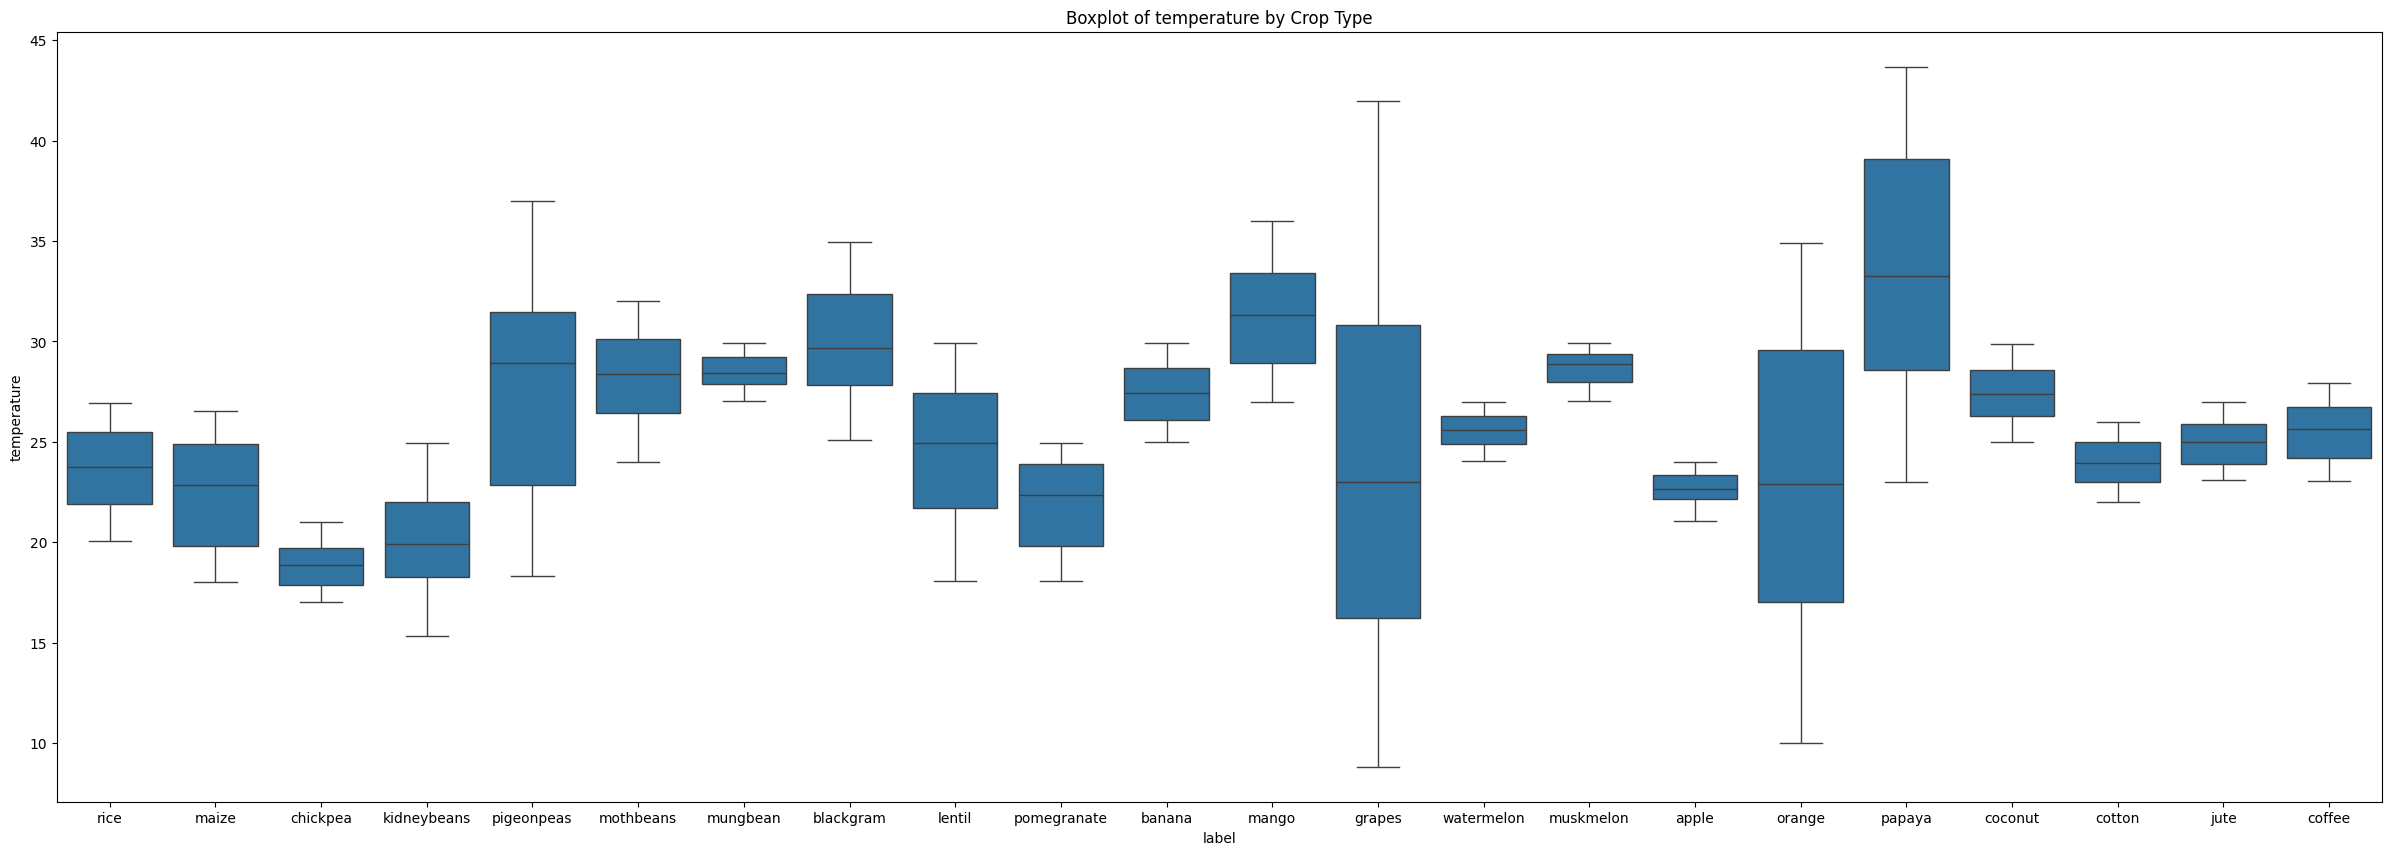

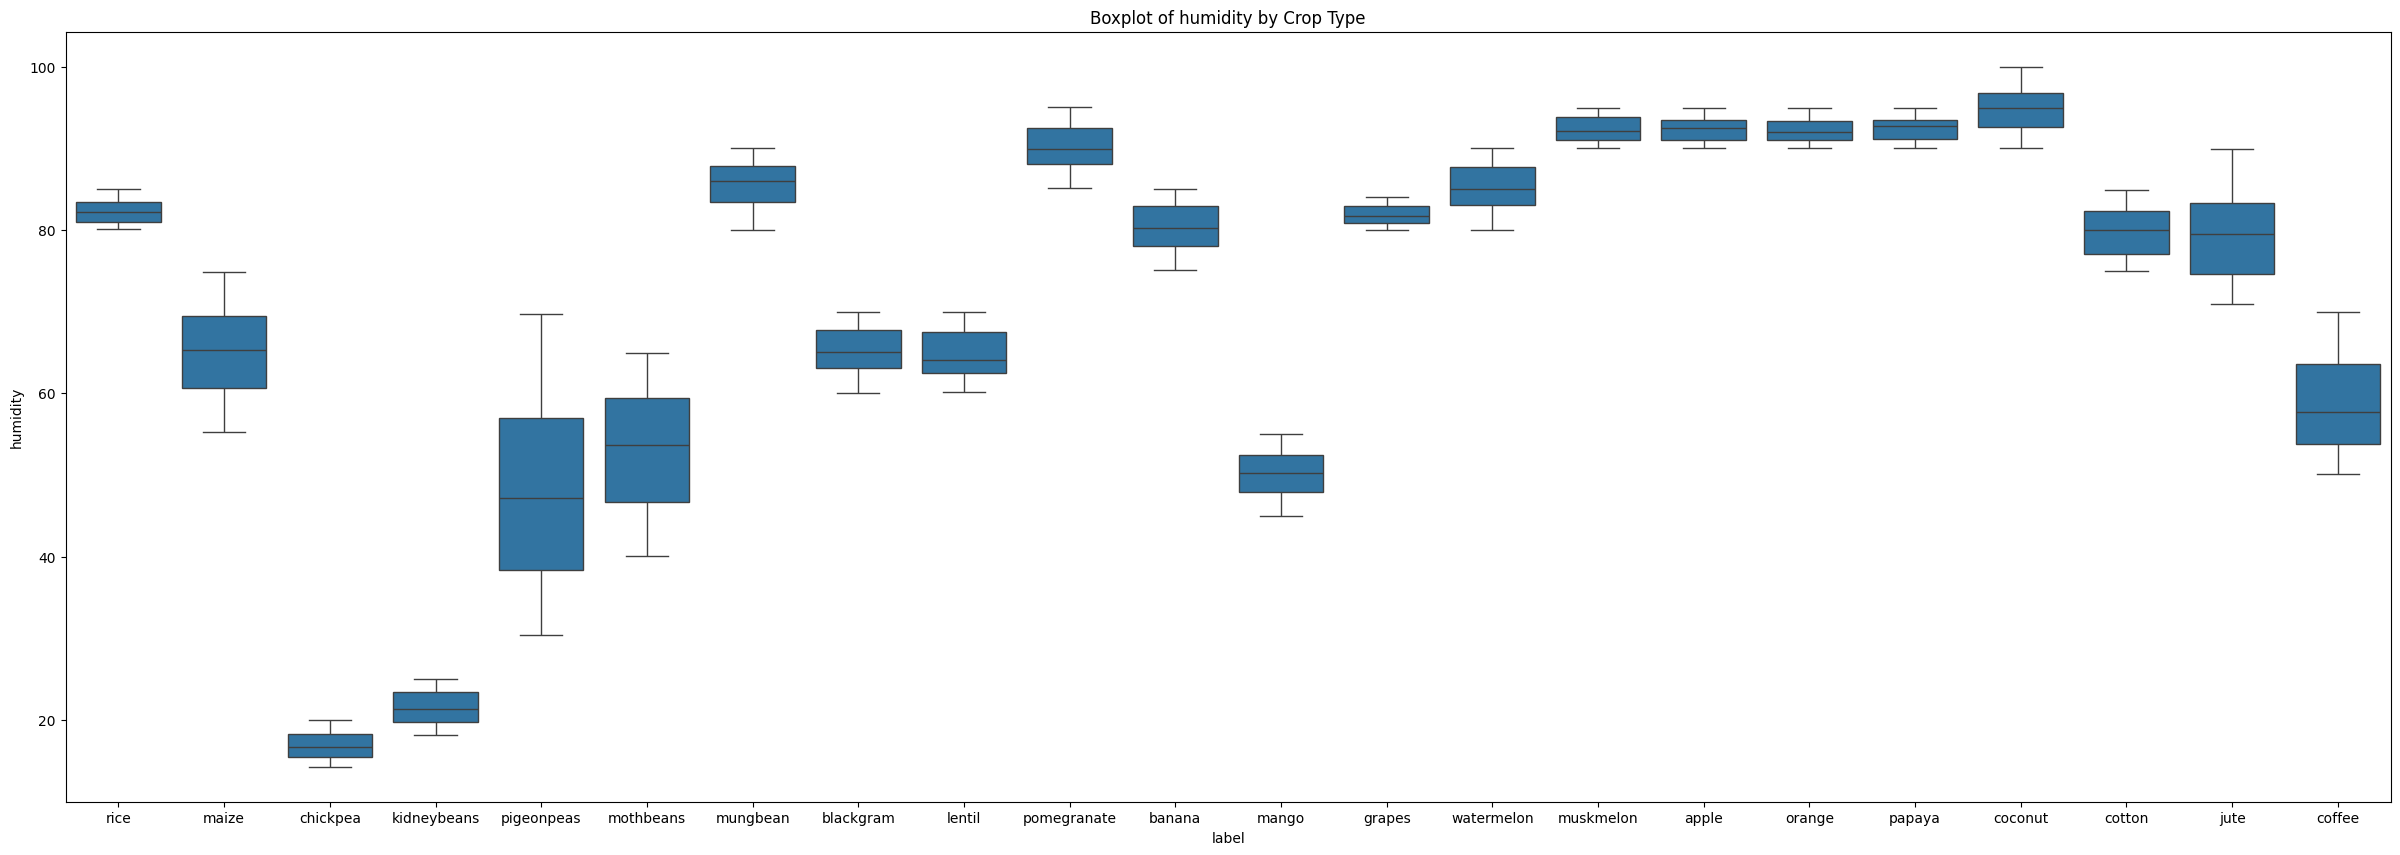

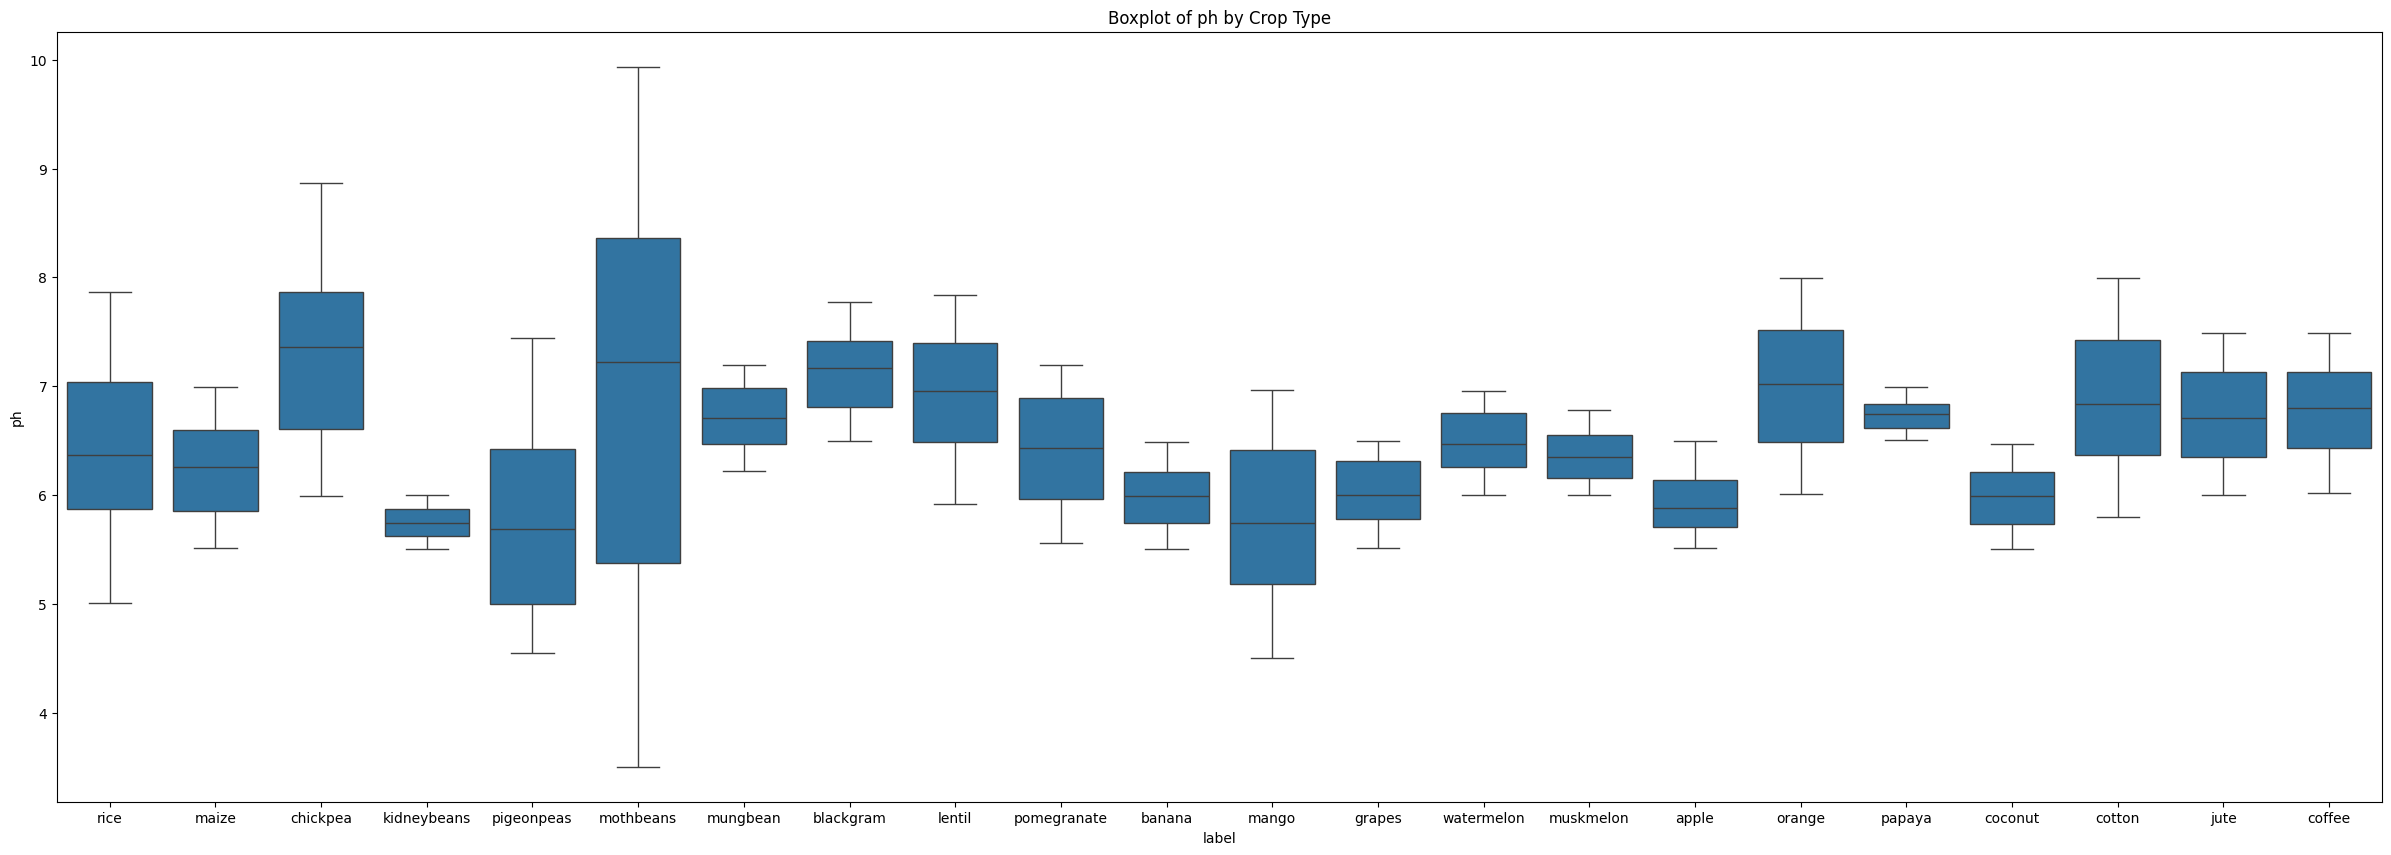

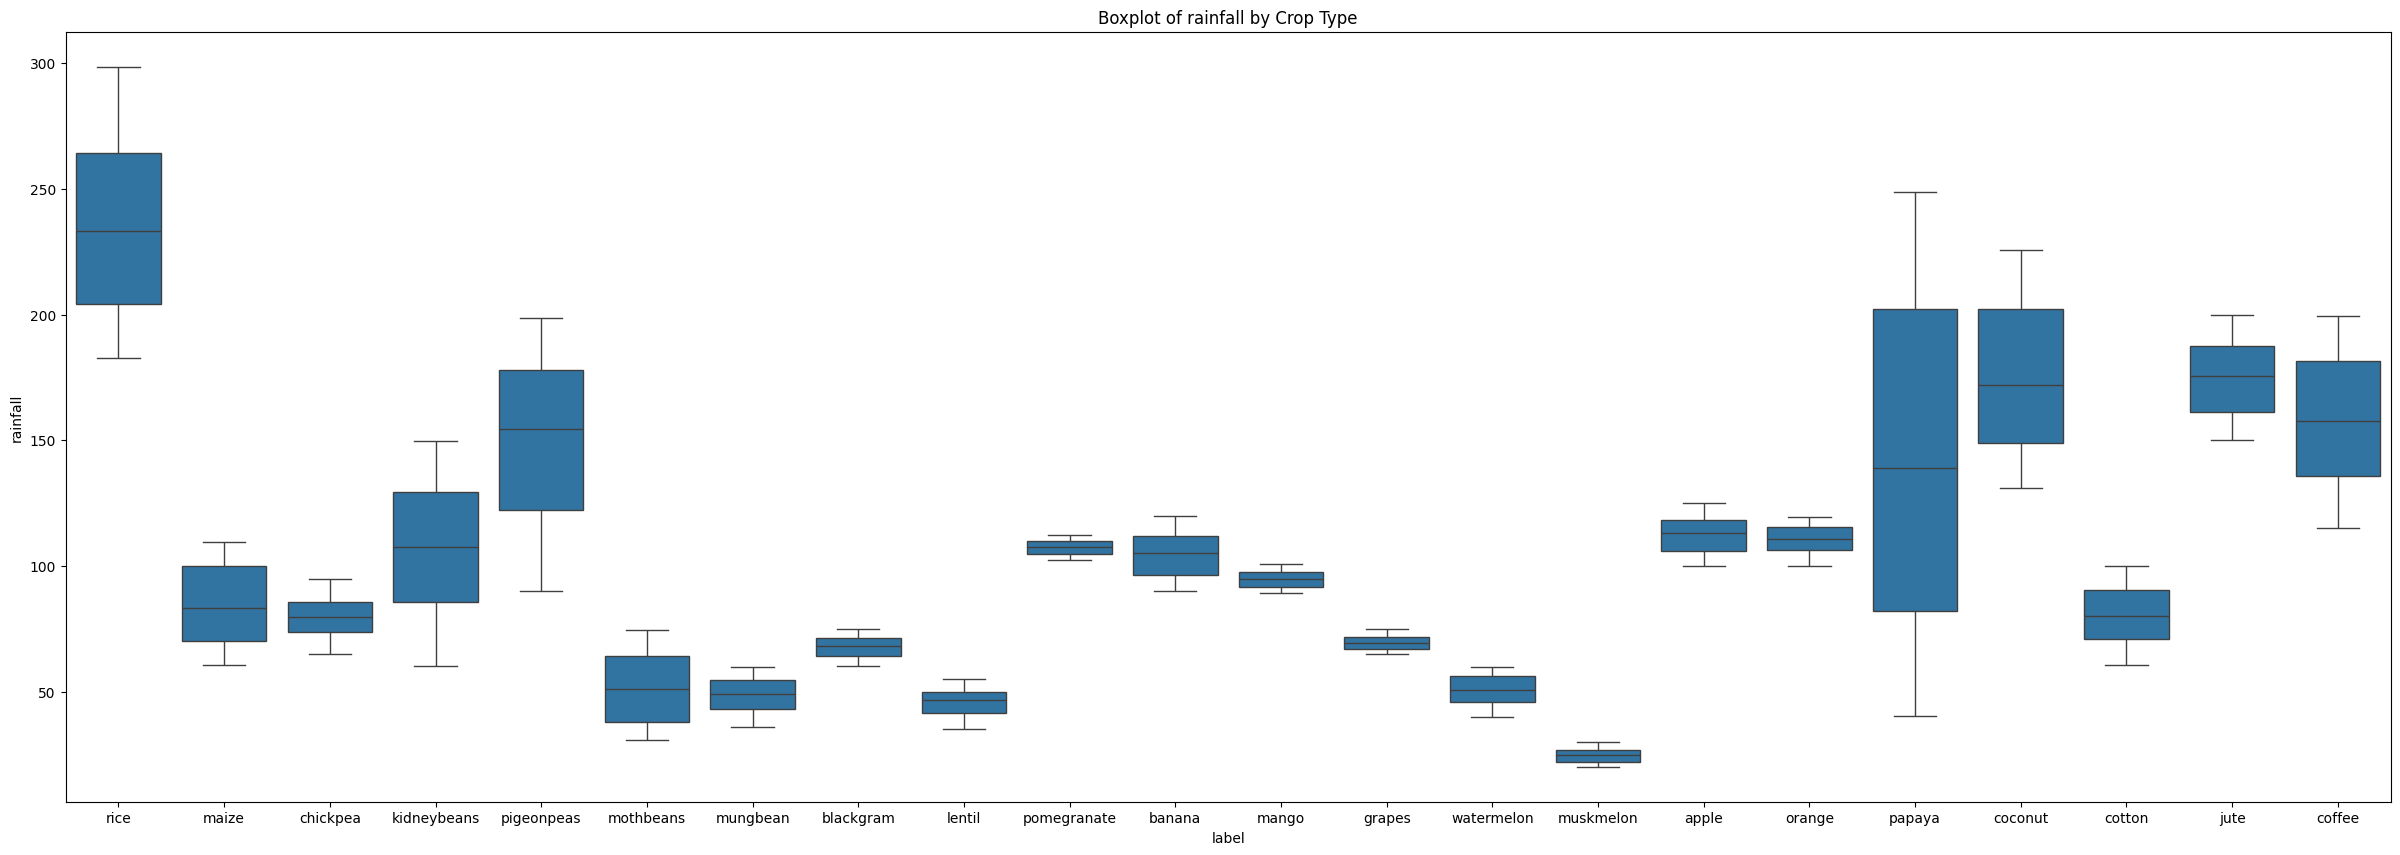

In [11]:
l = list(data.columns)
l.remove('label')

for col in l:
    plt.figure(figsize=(30,10))
    sns.boxplot(x='label', y=col, data=data)
    plt.title(f"Boxplot of {col} by Crop Type")
    plt.show()

### Heatmap 

* Relations between columns

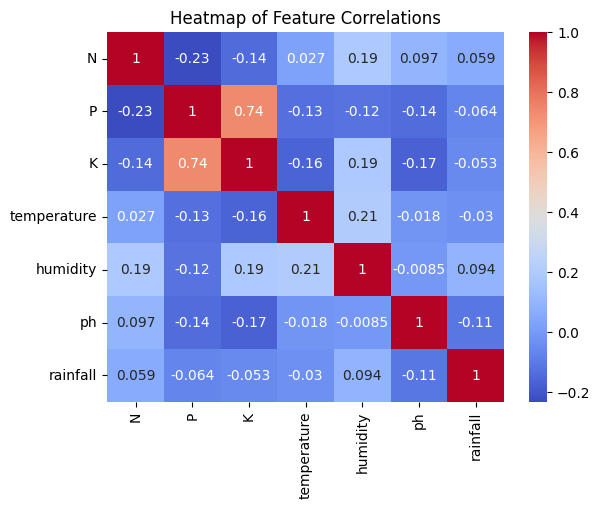

In [21]:
x = data.drop('label', axis=1)

sns.heatmap(x.corr() , annot=True, cmap='coolwarm')
plt.title("Heatmap of Feature Correlations")
plt.show()

### Split the dataset to ( train - test ) data


In [16]:
from sklearn.model_selection import train_test_split as ts

X = data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = ts(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (1760, 7)
Testing set size: (440, 7)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00    

### Results Analysis and Feature Importance

       Feature  Importance
6     rainfall    0.227036
4     humidity    0.211279
2            K    0.181222
1            P    0.143622
0            N    0.108859
3  temperature    0.075682
5           ph    0.052301


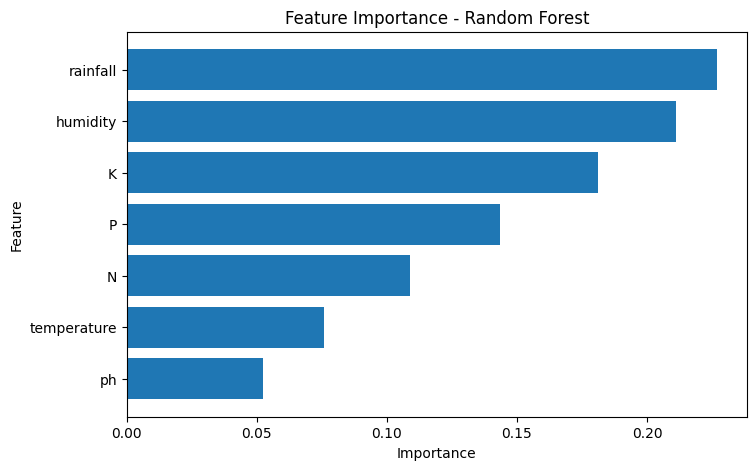

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extracting the importance of features from the model
importances = model.feature_importances_

# set it in DataFrame
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(8,5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


### Accuracy analysis (Accuracy + Confusion Matrix)

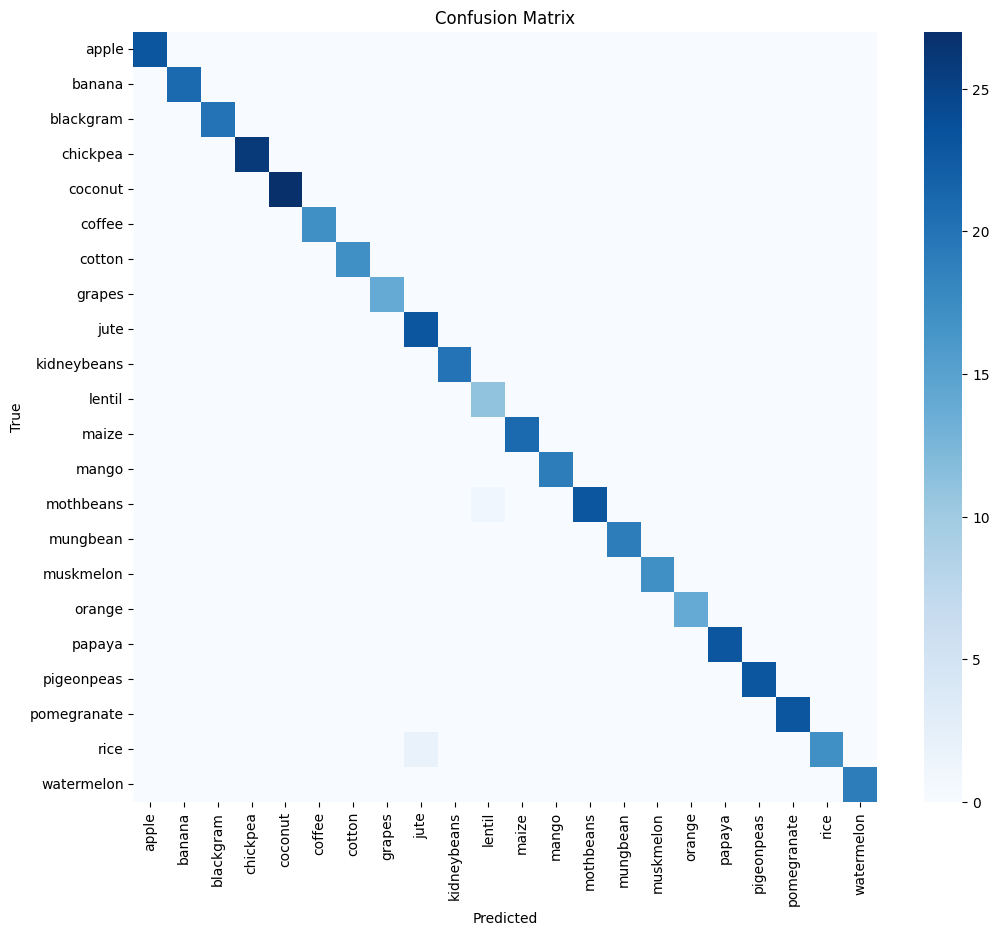

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


# Grid Search (Hyperparameter Tuning)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# test different hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#  initialize the model
rf = RandomForestClassifier(random_state=42)

#  execute grid search to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,          #  (cross validation)
    n_jobs=-1,     # use all available cores
    verbose=2 # print progress messages
)

grid_search.fit(X_train, y_train)

print("Best settings found by GridSearchCV:")
print(grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
أفضل إعدادات وجدها GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


### Choose the best model

In [26]:
best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("🔹 Best accuracy after optimization:", accuracy_score(y_test, y_pred_best))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred_best))


🔹 Best accuracy after optimization: 0.9931818181818182

🔹 Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17

### Save the model

In [30]:
import pickle

with open('crop_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
